# Validation for Computational Modeling Pipeline for WM Axon Stimulation 

### Extract E-Fields

##### Required Libraries

In [ ]:
import efield_helper_functions as ehf
import filter_and_resample as far

##### Extract Streamlines and E-Fields from Fiber Tract

In [2]:
base_path = 'test_files'
head_model = 'Ernie'
fiber_tract = 'AF_R_Ernie'
num_streamlines = 4

ehf.streamline_extraction(base_path, head_model, fiber_tract, num_streamlines)


In [3]:
streamline_number = 1
stim_type = 'Uniform'
stim_location = 'x-dir'

for streamline_number in range(1, num_streamlines + 1):
    ehf.efield_extraction(base_path, head_model, fiber_tract, streamline_number, stim_type, stim_location)

##### Visualize Resolution + Streamline

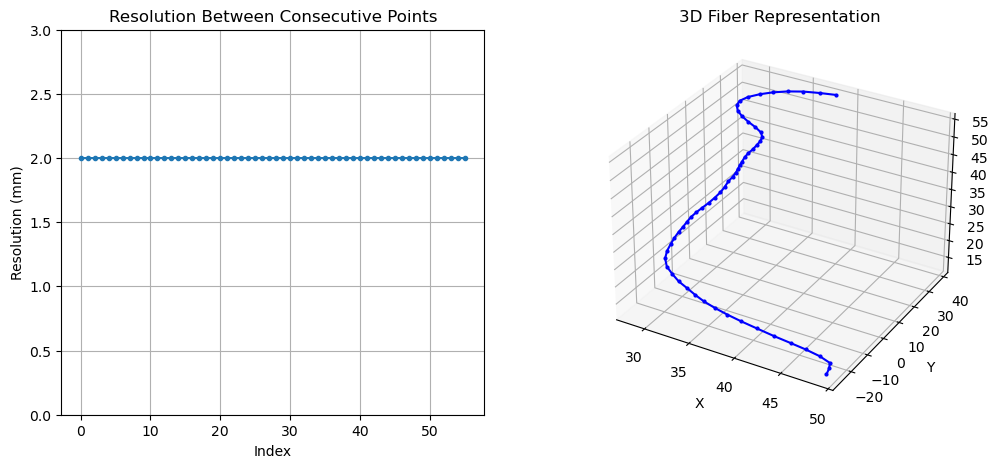

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

streamline_number = 1
coords = np.loadtxt(
    f"test_files/WM Fiber Tracts/Ernie/AF_R_Ernie/Coordinates/AF_R_Ernie_{streamline_number}_coordinates.csv",
    delimiter=","
)
x, y, z = coords[:, 0], coords[:, 1], coords[:, 2]

diffs = np.diff(coords, axis=0)
resolutions = np.linalg.norm(diffs, axis=1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(range(len(resolutions)), resolutions, marker='o', markersize=3, linestyle='-')
ax1.set_xlabel("Index")
ax1.set_ylabel("Resolution (mm)")
ax1.set_ylim(0, 3)
ax1.set_title("Resolution Between Consecutive Points")
ax1.grid(True)

ax3d = fig.add_subplot(1, 2, 2, projection='3d')
ax3d.plot(x, y, z, color='b', marker='o', markersize=2)
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
ax3d.set_title("3D Fiber Representation")

plt.show()

### Simulations

##### Required Libraries

In [1]:
import streamline_helper_functions as shf
import os

##### Find and Stimulate at Threshold

In [2]:
base_path = 'test_files'
head_model = 'Ernie'
fiber_tract = 'AF_R_Ernie'
streamline_number = 1
diameter = 10
stim_type = 'Uniform'
stim_location = 'x-dir'
pulse_width = 0.25
stimamp_bottom = 20
stimamp_top = 30

results_directory = os.path.join(
            base_path,
            f"{stim_type} Results",
            stim_location,
            head_model,
            str(pulse_width)
        )

os.makedirs(results_directory, exist_ok=True)
thresholds_file = os.path.join(
    results_directory,
    f"{fiber_tract}_{diameter}microns_"
    f"{stim_type}_{stim_location}_{pulse_width}ms.csv"
)

shf.find_streamline_threshold(base_path, head_model, fiber_tract, streamline_number, diameter, stim_type, stim_location, pulse_width, stimamp_bottom, stimamp_top)

Altering node count from 100 to 99 to enforce odd number.
Running: 30	N aps: 1, time 2.331
Running: 20	N aps: 0, time None
Search bounds: top=30, bottom=20
Found AP at 2.331 ms, subsequent runs will exit at 7.3309999999999995 ms. Change 'exit_t_shift' to modify this.
Beginning bisection search
Search bounds: top=30, bottom=20
Running: 25.0	N aps: 1, time 2.382
Search bounds: top=25.0, bottom=20
Running: 22.5	N aps: 1, time 2.436
Search bounds: top=22.5, bottom=20
Running: 21.25	N aps: 1, time 2.534
Search bounds: top=21.25, bottom=20
Running: 20.625	N aps: 0, time None
Search bounds: top=21.25, bottom=20.625
Running: 20.9375	N aps: 1, time 2.782
Search bounds: top=20.9375, bottom=20.625
Running: 20.78125	N aps: 0, time None
Search bounds: top=20.9375, bottom=20.78125
Running: 20.859375	N aps: 0, time None
Threshold found at stimamp = 20.9375
Validating threshold...
Running: 20.9375	N aps: 1, time 2.782
Running: 20.9375	N aps: 1, time 2.782


##### Visualize .vtk File

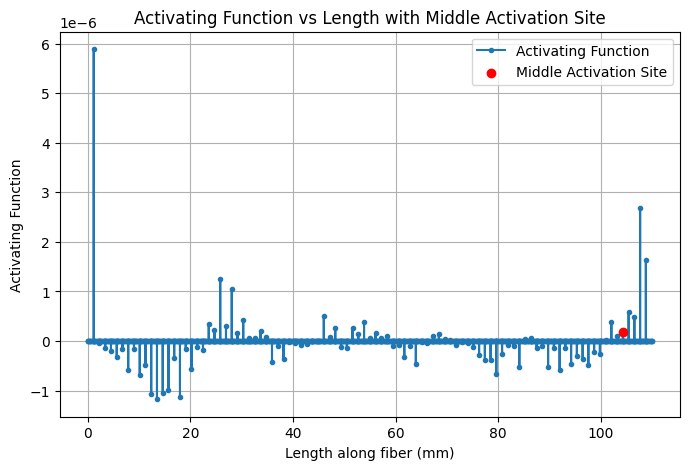

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

af_vtk_path = "test_files/Uniform Results/x-dir/Ernie/Visualizations/AF_R_Ernie/10_AF_R_Ernie_1_Uniform_x-dir.vtk"
ap_vtk_path = "test_files/Uniform Results/x-dir/Ernie/0.25/Activation Mapping/Threshold/AF_R_Ernie_10microns_1_Uniform_x-dir_0.25ms.vtk"

af_mesh = pv.read(af_vtk_path)
ap_mesh = pv.read(ap_vtk_path)

af_array = af_mesh.point_data["Activating Function"]
voltage_array = ap_mesh.point_data["Voltage"]

points = af_mesh.points
segment_lengths = np.linalg.norm(np.diff(points, axis=0), axis=1)
arc_length = np.insert(np.cumsum(segment_lengths), 0, 0.0)

activation_indices = np.where(voltage_array == 80.0)[0]
mid_index = activation_indices[len(activation_indices) // 2]

plt.figure(figsize=(8,5))
plt.plot(arc_length, af_array, marker='o', markersize=3, label="Activating Function")
plt.scatter(arc_length[mid_index], af_array[mid_index], color='red', zorder=5, label="Middle Activation Site")
plt.xlabel("Length along fiber (mm)")
plt.ylabel("Activating Function")
plt.title("Activating Function vs Length with Activation Site")
plt.grid(True)
plt.legend()
plt.show()
